In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image


In [2]:
import matplotlib as mpl

mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "DejaVu Serif"],
    "mathtext.fontset": "stix",
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
})


In [3]:
COLOR_MAP = {
    0: [0, 0, 0],
    1: [250, 62, 119],   # Forest
    2: [168, 232, 84],   # Grassland
    3: [242, 180, 92],   # Cropland
    4: [59, 141, 247],   # Settlement
    5: [255, 214, 33],   # Semi-Natural Grassland
}

CLASS_NAMES = {
    0: "Background",
    1: "Forest",
    2: "Grassland",
    3: "Cropland",
    4: "Settlement",
    5: "Semi-nat.",
}

# exclude background for plotting
PLOT_CLASS_IDS = [1, 2, 3, 4, 5]
LABELS = [CLASS_NAMES[k] for k in PLOT_CLASS_IDS]
Y = np.arange(len(PLOT_CLASS_IDS))


In [4]:
# find repo root
p = Path.cwd().resolve()
for _ in range(10):
    if (p / "data").is_dir() and (p / "scripts").is_dir():
        REPO_ROOT = p
        break
    p = p.parent

print("Repo root:", REPO_ROOT)

MASK_DIR = REPO_ROOT / "data/biodiversity_raw/masks"
assert MASK_DIR.exists(), "biodiversity_raw/masks not found"

mask_paths = sorted(MASK_DIR.glob("*.png"))
assert len(mask_paths) > 0, "No biodiversity masks found"

print(f"Found {len(mask_paths)} masks")


Repo root: /home/lainey/Documents/Github/ClassImbalance
Found 2307 masks


In [5]:
presence_counts = {k: 0 for k in PLOT_CLASS_IDS}
pixel_frac_sum = {k: 0.0 for k in PLOT_CLASS_IDS}

n_tiles = len(mask_paths)

for p in mask_paths:
    mask = np.array(Image.open(p))
    total_pixels = mask.size

    for k in PLOT_CLASS_IDS:
        cnt = np.count_nonzero(mask == k)
        if cnt > 0:
            presence_counts[k] += 1
        pixel_frac_sum[k] += cnt / total_pixels

presence_prop = np.array([presence_counts[k] / n_tiles for k in PLOT_CLASS_IDS])
mean_pixel_prop = np.array([pixel_frac_sum[k] / n_tiles for k in PLOT_CLASS_IDS])

print("Tile presence:", presence_prop)
print("Pixel proportion:", mean_pixel_prop)


Tile presence: [0.97052449 0.95405288 0.21673169 0.64152579 0.34633723]
Pixel proportion: [0.13277036 0.62958344 0.05490045 0.03280986 0.07303184]


In [6]:
out_path = REPO_ROOT / "figures/fig5_biodiv_class_imbalance.pdf"
out_path.parent.mkdir(parents=True, exist_ok=True)

fig.tight_layout()
fig.savefig(out_path, bbox_inches="tight")
plt.show()

print("Saved:", out_path)


NameError: name 'fig' is not defined

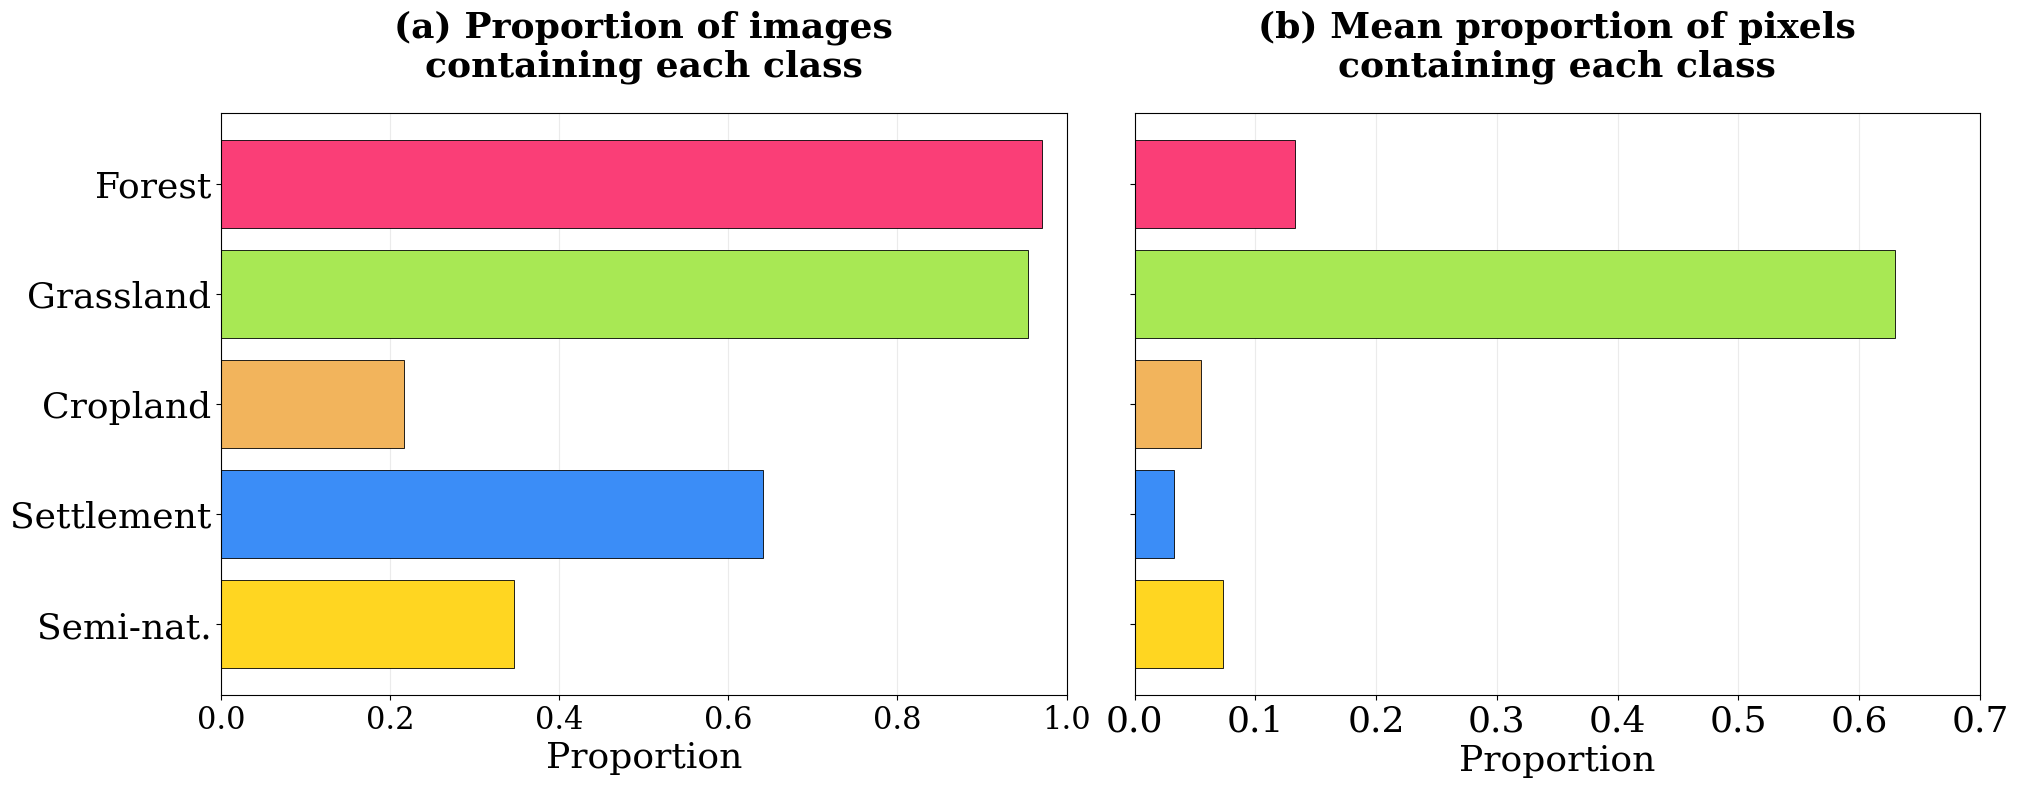

In [14]:
# --- Figure 5 plotting (match Fig2 style exactly) ---
fig, axes = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10*2, 4*2)
)

fig.subplots_adjust(wspace=0.25)

cols = [np.array(COLOR_MAP[k]) / 255.0 for k in PLOT_CLASS_IDS]

# -------- Panel (a): proportion of tiles --------
ax = axes[0]
ax.barh(
    Y,
    presence_prop,
    color=cols,
    edgecolor="black",
    linewidth=0.6
)

ax.set_yticks(Y)
ax.set_yticklabels(LABELS, fontsize=26)
ax.invert_yaxis()
ax.set_xlim(0, 1.0)
ax.set_xlabel("Proportion", fontsize=26)

# move (a) up (Fig2 style)
ax.text(
    0.5, 1.05, "(a) Proportion of images\ncontaining each class",
    transform=ax.transAxes,
    ha="center", va="bottom",
    fontsize=26, fontweight="bold"
)

ax.grid(True, axis="x", alpha=0.25)
ax.set_axisbelow(True)
ax.tick_params(axis="x", labelsize=22)

# -------- Panel (b): mean pixel proportion --------
ax = axes[1]
ax.barh(
    Y,
    mean_pixel_prop,
    color=cols,
    edgecolor="black",
    linewidth=0.6
)

ax.set_yticks(Y)
ax.set_yticklabels([])  # remove class labels on right plot
ax.invert_yaxis()
ax.set_xlim(0, 0.7)     # <- keep your requested max
# Optional: uncomment if you want fixed ticks like Fig2
# ax.set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

ax.set_xlabel("Proportion", fontsize=26)

# move (b) up (Fig2 style)
ax.text(
    0.5, 1.05, "(b) Mean proportion of pixels\ncontaining each class",
    transform=ax.transAxes,
    ha="center", va="bottom",
    fontsize=26, fontweight="bold"
)

ax.grid(True, axis="x", alpha=0.25)
ax.set_axisbelow(True)
ax.tick_params(axis="x", labelsize=26)

out_path = REPO_ROOT / "figures" / "fig5_biodiv_class_imbalance.pdf"
out_path.parent.mkdir(parents=True, exist_ok=True)

fig.tight_layout()
fig.savefig(out_path)
plt.show()
